In [18]:
import numpy as np
import pandas as pd
from pandas import ExcelFile
from pandas import ExcelWriter
import matplotlib.pyplot as pt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:

obs = np.array([17,42,26,22,17,14,10,29,28,17,9,15,18])
sim = np.array([16.4,40,33,24,15,16,17,28,19,10,11,11,13])


def NSE(obs: list, sim: list) -> float:
    denominator = np.sum((obs-np.mean(obs))**2)
    numerator = np.sum((obs-sim)**2)
    NSE = 0
    if denominator == 0:
        print("Error: denominator is '0'.")
        
    else:
        NSE = 1 - (numerator/denominator)
        NSE = round(NSE,3)
        return NSE



def PBIAS(obs: list, sim: list) -> float:
    denominator = np.sum(obs)
    numerator = np.sum(sim-obs)
    if denominator == 0:
        print("Error: denominator is '0'.")
    else:
        pbias = 100*(numerator/denominator)
        pbias = round(pbias,3)
    return pbias


def R2(obs: list, sim: list) -> float:
    corr = np.corrcoef(obs,sim)
    corr = corr[0,1]
    R2 = round(corr**2,3)
    return R2

def RMSE(obs: list, sim: list) -> float:
    RMSE = np.sqrt(((sim-obs)**2).mean())
    print("RMSE:")
    return RMSE



In [3]:
# Read data file (excel)
sample =  pd.read_excel('sample.xlsx',sheet_name='Sheet1', engine='openpyxl')
obs = sample['obs']
sim = sample['sim']

RMSE(obs,sim)

RMSE:


7.64750424552198

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

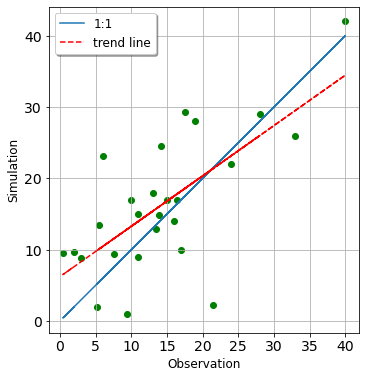

In [4]:
pt.figure(figsize= (6,6))
pt.grid()
pt.gca().set_aspect("equal")

pt.scatter(obs,sim, color='g')
pt.plot(obs,obs,label = '1:1')

z = np.polyfit(obs,sim,1)
p = np.poly1d(z)
pt.plot(obs,p(obs),"r--",label='trend line')

pt.xlabel("Observation", fontsize='large')
pt.ylabel("Simulation", fontsize='large')
pt.legend(loc='best')

pt.legend(loc='best',shadow=True, fontsize='large')
pt.xticks(fontsize=14)
pt.yticks(fontsize=14)

In [5]:
print(type(sample['Date']))
sample['Date'] = pd.to_datetime(sample['Date'])
print(type(sample['Date']))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

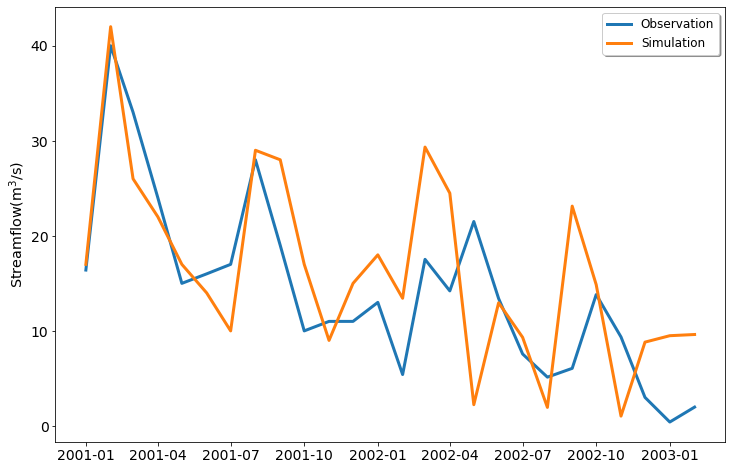

In [6]:
sample_data =  pd.read_excel('sample.xlsx',sheet_name='Sheet1', engine='openpyxl')

# sns.scatterplot(x='obs',y='sim',data=sample_data)
# line, ax = pt.subplots()
# ax = 
pt.figure(figsize= (12,8))
sns.lineplot(x='Date',y='obs',data=sample_data,label = "Observation",linewidth=3)
sns.lineplot(x='Date',y='sim',data=sample_data, label = 'Simulation',linewidth=3)
pt.xlabel("")
pt.ylabel("Streamflow(m$^3$/s)", fontsize='x-large')
pt.legend(loc='best',shadow=True, fontsize='large')
pt.xticks(fontsize=14)
pt.yticks(fontsize=14)

In [7]:
from tkinter import *
# from PIL import ImageTK, Image
from tkinter import filedialog

import os



In [ ]:
data_path = filedialog.askopenfilename()
filename, file_extension = os.path.splitext(data_path)

print(".csv"==file_extension)

data_path

In [13]:
print(NSE([0]*len(sim), sim))

Error: denominator is '0'.


UnboundLocalError: local variable 'NSE' referenced before assignment

In [27]:
import plotly.graph_objects as go

data_path = r"E:\03_Codes\02_codable_2021\backend\Model_eval\streamflow_andong.csv"
data =  pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])   #Read date
date = data['Date']
obs = data['obs']
sim = data['sim']


# fig = go.Figure([go.Scatter(x=df['Date'], y=df['AAPL.High'])])
fig = go.Figure([go.Scatter(x=date, y=obs)])
fig = go.Figure([go.Scatter(x=date, y=sim)])
fig.show()

# print(date)

data

,Date,obs,sim
0,2011-01-02,2.46,4.1830
1,2011-01-03,2.40,4.1860
2,2011-01-04,0.82,3.8970
3,2011-01-05,2.42,3.5950
4,2011-01-06,2.20,3.7150
...,...,...,...
1820,2015-12-27,7.08,0.6620
1821,2015-12-28,4.06,0.6117
1822,2015-12-29,0.99,0.8948
1823,2015-12-30,4.04,1.0800


In [57]:
import plotly.express as px

fig = px.line(data, x="Date", y=data.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M6",
    tickformat="%m\n%Y")
fig.show()

df = px.data.stocks()
df

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [58]:
import plotly.express as px
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels with ticklabelmode="period"')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [60]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [66]:
# df = px.data.iris()
fig = px.scatter(data, x="obs", y="sim")
fig.show()

data

,Date,obs,sim
0,2011-01-02,2.46,4.1830
1,2011-01-03,2.40,4.1860
2,2011-01-04,0.82,3.8970
3,2011-01-05,2.42,3.5950
4,2011-01-06,2.20,3.7150
...,...,...,...
1820,2015-12-27,7.08,0.6620
1821,2015-12-28,4.06,0.6117
1822,2015-12-29,0.99,0.8948
1823,2015-12-30,4.04,1.0800


In [76]:
import plotly.graph_objects as go
import pandas as pd

data_path = r"E:\03_Codes\02_codable_2021\backend\Model_eval\streamflow_andong.csv"
data =  pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])   #Read date
date = data['Date']
obs = data['obs']
sim = data['sim']

fig = go.Figure(data=go.Scatter(x=obs,
                                y=sim,
                                mode='markers',
#                                 marker_color=data['Population'],
                                text=date)) # hover text goes here
fig.show()

In [72]:
sample = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")
sample 

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377.0
1,2,Alaska,AK,736732.0
2,3,Arizona,AZ,6731484.0
3,4,Arkansas,AR,2966369.0
4,5,California,CA,38802500.0
5,6,Colorado,CO,5355866.0
6,7,Connecticut,CT,3596677.0
7,8,Delaware,DE,935614.0
8,9,District of Columbia,DC,658893.0
9,10,Florida,FL,19893297.0
